In [115]:
with open("svante.txt") as f:
    text = f.read()
svante = text.split(" ")

with open("arctic.txt") as f:
    text = f.read()
arctic = text.split(" ")

In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)


In [116]:
from tqdm import tqdm

def create_embedding(words):        
    chunk_size = 25
    chunk_stride = 5
    # Split words into chunks of size chunk_size and stride chunk_stride
    chunks = [words[i:i+chunk_size] for i in range(0, len(words), chunk_stride)]

    # Loop over all chunks and generate embeddings
    embeddings = []
    for chunk in tqdm(chunks):
        chunk_as_str = " ".join(chunk)
        embedding = client.embeddings.create(input = chunk_as_str, model = "text-embedding-3-large", dimensions=256, timeout=5)
        embeddings.append(embedding.data[0].embedding)
    return chunks, embeddings

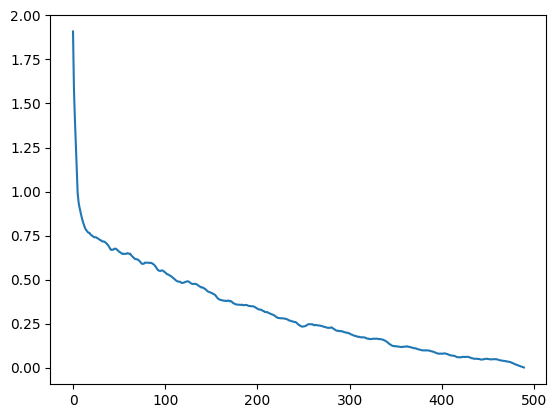

In [87]:
# import numpy as np

# def autocorr(x):
#     result = np.correlate(x, x, mode='full')
#     return result[int(result.size/2):]

# def autocorr_embeddings(embeddings):
#     numpy_embeddings = np.asarray(embeddings)
#     corr = autocorr(numpy_embeddings[:,0])
#     all_corr = np.zeros(corr.shape)
#     for i in range(1, 256):
#         corr = autocorr(numpy_embeddings[:,i])
#         all_corr += corr
#     all_corr /= 256
    

In [117]:
import numpy as np
def autocorr(embeddings):
    corr_values = np.zeros(len(embeddings))
    counts = np.zeros(len(embeddings))
    for i in range(len(embeddings)):
        for j in range(i, len(embeddings)):
            corr_values[j-i] += np.dot(embeddings[i], embeddings[j])
            counts[j-i] += 1

    corr_values /= counts
    return corr_values

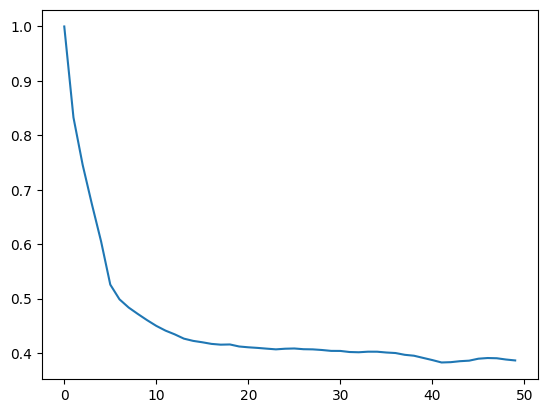

In [114]:
plt.figure()
#divided = all_corr/corr_values
plt.plot(corr_values[0:50])
#plt.plot(all_corr, '--')
#plt.figure()
#plt.plot(divided)

In [118]:
svante_chunks, svante_embeddings = create_embedding(svante)
svante_corr = autocorr(svante_embeddings)

import matplotlib.pyplot as plt
arctic_chunks, arctic_embeddings = create_embedding(arctic)
arctic_corr = autocorr(arctic_embeddings)
plt.plot(arctic_corr[0:50])


 21%|██        | 110/528 [00:56<02:36,  2.66it/s]

In [ ]:
plt.figure()
plt.plot(arctic_corr[0:50])
plt.plot(corr_values[0:50])

In [77]:
119805/490

244.5